In [8]:
import operator, random, math
import numpy as np
from deap import algorithms, base, creator, tools, gp
import matplotlib.pyplot as plt

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)



/home/janneke/anaconda3/envs/naco/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/janneke/anaconda3/envs/naco/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [124]:
"""Create primitive set as specified
"""
pset = gp.PrimitiveSet(name="MAIN", arity=1)
pset.addPrimitive(operator.add, arity=2)
pset.addPrimitive(operator.sub, arity=2)
pset.addPrimitive(operator.mul, arity=2)
pset.addPrimitive(math.log, arity=1)
pset.addPrimitive(math.exp, arity=1)
pset.addPrimitive(math.sin, arity=1)
pset.addPrimitive(math.cos, arity=1)
pset.addPrimitive(operator.truediv, arity=2)
pset.renameArguments(ARG0="x")
stats_fit = tools.Statistics(key=lambda ind: ind.fitness.values)
stats_size = tools.Statistics(key=len)

mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean, axis = 0)
mstats.register("std", np.std, axis = 0)
mstats.register("min", np.min, axis = 0)
mstats.register("max", np.max, axis = 0)
mstats.register("size_fit", np.where)

In [125]:
def evaluateRegression(individual, points, pset):
    fit = [0.000, -0.1629, -0.2624, -0.3129 -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.909, 0.0, 0.1111, 0.2496, 0.4251, 0.6496, 0.9375, 1.3056, 1.7731, 2.3616, 3.0951, 4]
    func = gp.compile(expr=individual, pset=pset)
    pts = []
    for x in points:
        try:
            pts.append(func(x))
        except (OverflowError, ValueError, ZeroDivisionError) as e:
            pts.append(x)
    abserrors = np.abs(np.subtract(fit, pts).tolist())
    return sum(abserrors),

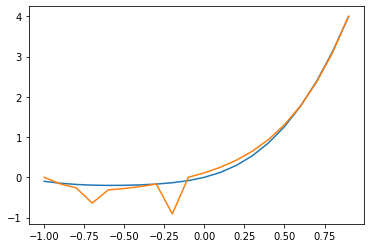

In [127]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluateRegression, points=[x/10. for x in range(-10, 10)],
                 pset=pset)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("select", tools.selTournament, tournsize=3)

points = [x/10. for x in range(-10, 10)]
best_size = []
best_fitness = []
if __name__ == "__main__":
    pop= toolbox.population(n=1000)
    pop, logbook =  algorithms.eaSimple(pop, toolbox,  stats=mstats, cxpb=0.7, mutpb=0, ngen=50, verbose=False)
    bests = tools.selBest(pop, k=1)
    func = gp.compile(expr=bests[0], pset=pset)
    lst = [func(x) for x in points]
    points=[x/10. for x in range(-10, 10)]
    fit = [0.000, -0.1629, -0.2624, -0.3129 -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.909, 0.0, 0.1111, 0.2496, 0.4251, 0.6496, 0.9375, 1.3056, 1.7731, 2.3616, 3.0951, 4]
    plt.plot(points,lst)
    plt.plot(points, fit)

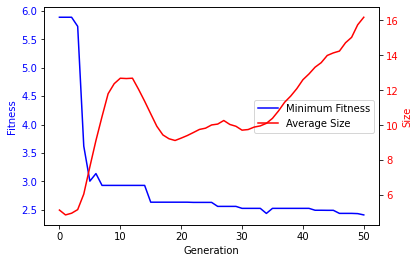

In [130]:
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
size_avgs = logbook.chapters["size"].select("avg")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()